In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA 

import matplotlib.pyplot as plt

## EDA for Milestone 4

In [145]:
df_original = pd.read_csv('../sample_data_2017_M4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (6,9,12,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [146]:
df_990 = df_original[df_original['FormType'] == '990']
df_990EZ = df_original[df_original['FormType'] == '990EZ']
df_990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15377 entries, 49152 to 64528
Data columns (total 33 columns):
ActivityOrMissionDesc                    15375 non-null object
BooksInCareOfDetail/USAddress/ZIPCode    15343 non-null float64
CYSalariesCompEmpBnftPaidAmt             15377 non-null float64
CYTotalExpensesAmt                       15377 non-null float64
CYTotalProfFndrsngExpnsAmt               15377 non-null float64
CYTotalRevenueAmt                        15377 non-null float64
Desc                                     15328 non-null object
EIN                                      15377 non-null int64
EmployeeCnt                              15377 non-null float64
FormType                                 15377 non-null object
GovernmentGrantsAmt                      3692 non-null float64
GrossReceiptsAmt                         15377 non-null float64
MissionDesc                              15358 non-null object
NetAssetsOrFundBalancesEOYAmt            15377 non-null float6

In [147]:
df_990EZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43143 entries, 64529 to 107671
Data columns (total 33 columns):
ActivityOrMissionDesc                    43134 non-null object
BooksInCareOfDetail/USAddress/ZIPCode    43100 non-null float64
CYSalariesCompEmpBnftPaidAmt             0 non-null float64
CYTotalExpensesAmt                       0 non-null float64
CYTotalProfFndrsngExpnsAmt               0 non-null float64
CYTotalRevenueAmt                        0 non-null float64
Desc                                     0 non-null object
EIN                                      43143 non-null int64
EmployeeCnt                              0 non-null float64
FormType                                 43143 non-null object
GovernmentGrantsAmt                      0 non-null float64
GrossReceiptsAmt                         42486 non-null float64
MissionDesc                              0 non-null object
NetAssetsOrFundBalancesEOYAmt            42399 non-null float64
OrganizationName            

In [148]:
df_original = df_original.drop(['ActivityOrMissionDesc'
              , 'BooksInCareOfDetail/USAddress/ZIPCode'
              , 'Desc'
              , 'MissionDesc'
              , 'OrganizationName'
              , 'URL'
              , 'WebsiteAddressTxt'
              , '_id'
              , 'FormType'
              , 'TaxExemptBondsInd'
              , 'TaxPeriod'
             ], axis =1)

In [106]:
def standardize(df):
    df = df.fillna(0)
    cols = df.loc[:, df.columns != 'EIN'].columns
    df = pd.DataFrame(preprocessing.scale(df.loc[:, df.columns != 'EIN']))
    df.columns = cols
    df['EIN'] = df_original['EIN']
    return df

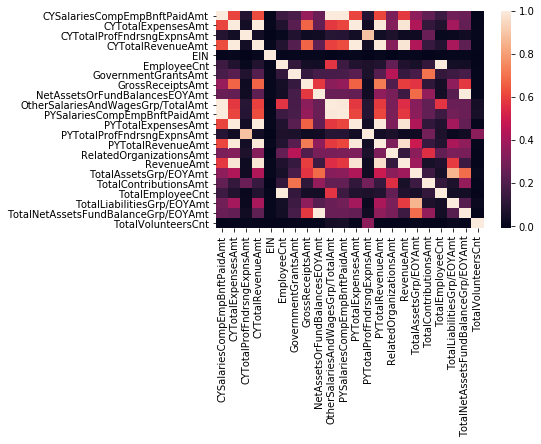

In [5]:
## correlation matrix
## unsurprisingly, revenue-related fields are correlated, as are salary fields, net assets, etc.
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Decide how we want to handle missing data. Zero-fill probably not the best.

In [112]:
def PCA_components(df):
    pca = PCA()
    pca.fit(df.loc[:, df.columns != 'EIN'])
    df_pca = pca.transform(df.loc[:, df.columns != 'EIN'])
    var = pca.explained_variance_ratio_
    var_cumsum = np.cumsum(var)
    comp = range(1, len(var)+1)

    %matplotlib inline
    plt.plot(comp,var_cumsum)
    plt.xlabel('Components')
    plt.ylabel('% Variance')
    plt.title('Variance explained by each component')
    print(var_cumsum)

In [121]:
def fit_pca(df, n):
    pca = PCA(n_components = n)
    pca.fit(df.loc[:, df.columns != 'EIN'])
    df_pca = pca.transform(df.loc[:, df.columns != 'EIN'])
    df_pca = pd.DataFrame(df_pca)
    df_pca['EIN'] = df['EIN']
    return df_pca

In [126]:
def plot_elbow(df, k_max=50):
    distortions = []
    K = range(1, k_max)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, init = 'k-means++', random_state = 0).fit(df.loc[:, df.columns != 'EIN'])
        distortions.append(sum(np.min(cdist(df.loc[:, df.columns != 'EIN'], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.loc[:, df.columns != 'EIN'].shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.show()

In [130]:
def fit_kmeans(df, n):
    model = KMeans(n_clusters = n, init = 'k-means++', random_state = 0).fit(df.loc[:, df.columns != 'EIN'])
    return model

In [61]:
df_pca['k20_labels'] = k20.labels_
df_pca.groupby('k20_labels').count()

,0,1,2,3,4,5,6,7,EIN
k20_labels,,,,,,,,,
0,106757,106757,106757,106757,106757,106757,106757,106757,106757
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1
5,13,13,13,13,13,13,13,13,13
6,30,30,30,30,30,30,30,30,30
7,1,1,1,1,1,1,1,1,1
8,9,9,9,9,9,9,9,9,9


### Split data into groups based on EmployeeCnt and model separately

In [92]:
for p in [0.25, 0.5, 0.75, 0.9]:
    print(str(p) + '%: ' + str(df_original[df_original['EmployeeCnt'] != 0]['EmployeeCnt'].quantile(p)))

0.25%: 4.0
0.5%: 12.0
0.75%: 43.0
0.9%: 166.0


In [113]:
df0 = df_original[df_original['EmployeeCnt'].isna()].append(df_original[df_original['EmployeeCnt'] == 0])
df1 = df_original[df_original['EmployeeCnt'] > 0]
df1 = df1[df1['EmployeeCnt'] < 50]
df2 = df_original[df_original['EmployeeCnt'] >= 50]

In [114]:
print(len(df_original) == len(df0) + len(df1) + len(df2))
print(len(df0), len(df1), len(df2))

True
68954 29964 8754


In [115]:
df0 = standardize(df0)
df1 = standardize(df1)
df2 = standardize(df2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


[0.37467735 0.49505902 0.60857626 0.70396073 0.78715009 0.84773429
 0.90455839 0.94214539 0.96522328 0.98047395 0.99450389 0.99848268
 0.99961373 0.99982395 0.99990429 0.99994913 0.99998735 1.
 1.         1.         1.        ]


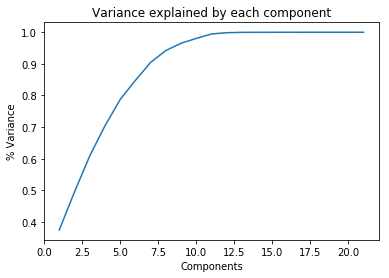

In [119]:
# PCA_components(df0) # 9 components
# PCA_components(df1) # 11 components
PCA_components(df2) # 9 components

In [122]:
df00 = fit_pca(df0, 9)
df11 = fit_pca(df1, 11)
df22 = fit_pca(df2, 9)

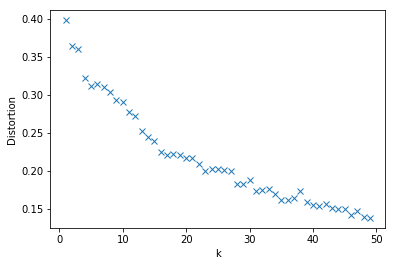

In [127]:
plot_elbow(df00)

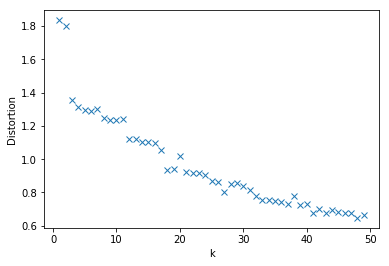

In [128]:
plot_elbow(df11)

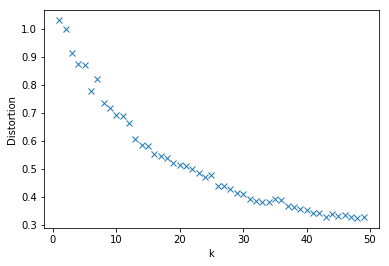

In [129]:
plot_elbow(df22)

In [144]:
model = fit_kmeans(df00, 30)
df00['labels'] = model.labels_
df00.groupby('labels').count()['EIN']

labels
0     67553
1       891
2         1
3         2
4         1
5         1
6         1
7        17
8         1
9         6
10        1
11        1
12        3
13        4
14       16
15       13
16       24
17        5
18      188
19       55
20        1
21       11
22       20
23        1
24       20
25      107
26        1
27        1
28        5
29        3
Name: EIN, dtype: int64

In [138]:
model = fit_kmeans(df11, 20)
df11['labels'] = model.labels_
df11.groupby('labels').count()['EIN']

labels
0      1491
1     13220
2      3249
3      7355
4         2
5      1949
6      2185
7         3
8         1
9        17
10        1
11       12
12       64
13       56
14      305
15        2
16        3
17        3
18        7
19       39
Name: EIN, dtype: int64

In [139]:
model = fit_kmeans(df22, 30)
df22['labels'] = model.labels_
df22.groupby('labels').count()['EIN']

labels
0     7397
1      417
2        1
3       40
4        1
5      394
6        1
7        4
8        1
9        1
10       5
11       4
12       7
13       1
14     132
15      33
16      79
17       3
18       1
19      54
20      95
21       6
22      25
23       1
24       1
25      11
26       1
27       8
28       6
29      24
Name: EIN, dtype: int64

### Split data based on TotalAssetsGrp/EOYAmt

In [149]:
for p in [0.25, 0.5, 0.75, 0.9]:
    print(str(p) + '%: ' + str(df_original[df_original['TotalAssetsGrp/EOYAmt'] != 0]['TotalAssetsGrp/EOYAmt'].quantile(p)))

0.25%: 48984.75
0.5%: 213382.0
0.75%: 1185674.0
0.9%: 6419648.0


(array([1.07657e+05, 1.10000e+01, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.98639130e+07,  7.99319123e+09,  1.60062464e+10,  2.40193015e+10,
         3.20323566e+10,  4.00454118e+10,  4.80584669e+10,  5.60715221e+10,
         6.40845772e+10,  7.20976323e+10,  8.01106875e+10]),
 <a list of 10 Patch objects>)

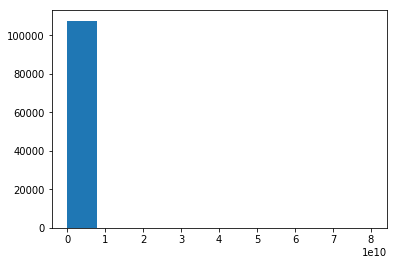

In [163]:
plt.hist(df_original['TotalAssetsGrp/EOYAmt'])

In [169]:
df0 = df_original[df_original['TotalAssetsGrp/EOYAmt'] < 50000]
df1 = df_original[df_original['TotalAssetsGrp/EOYAmt'] >= 50000]
df1 = df1[df1['TotalAssetsGrp/EOYAmt'] < 1000000]
df2 = df_original[df_original['TotalAssetsGrp/EOYAmt'] >= 1000000]

In [170]:
print(len(df_original) == len(df0) + len(df1) + len(df2))
print(len(df0), len(df1), len(df2))

True
28873 50198 28601


In [171]:
df0 = standardize(df0)
df1 = standardize(df1)
df2 = standardize(df2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


[0.42117397 0.54591463 0.66238029 0.75741731 0.82548974 0.88715386
 0.92809236 0.95461694 0.97009446 0.98447884 0.99419154 0.9982434
 0.99955996 0.99977344 0.99987758 0.9999306  0.99997927 0.99999839
 1.         1.         1.        ]


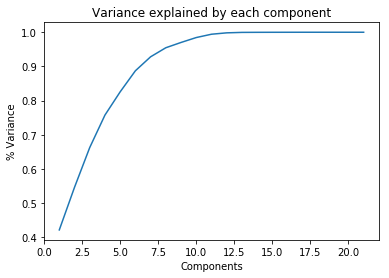

In [174]:
# PCA_components(df0) # 10 components
# PCA_components(df1) # 11 components
PCA_components(df2) # 8 components

In [175]:
df00 = fit_pca(df0, 10)
df11 = fit_pca(df1, 11)
df22 = fit_pca(df2, 8)

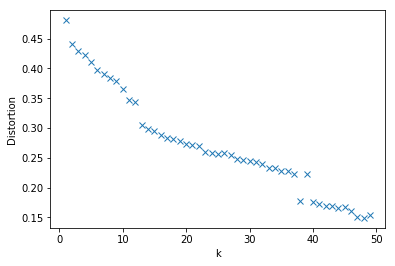

In [176]:
plot_elbow(df00)

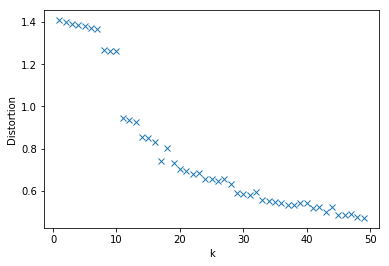

In [177]:
plot_elbow(df11)

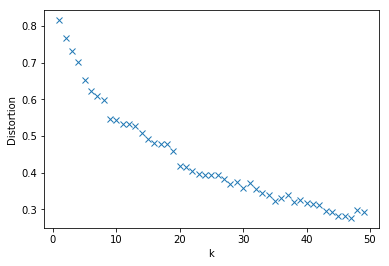

In [178]:
plot_elbow(df22)

In [182]:
model = fit_kmeans(df00, 12)
df00['labels'] = model.labels_
df00.groupby('labels').count()['EIN']

labels
0     12610
1     15957
2         5
3       279
4         1
5         6
6         3
7         1
8         8
9         1
10        1
11        1
Name: EIN, dtype: int64

In [184]:
model = fit_kmeans(df11, 20)
df11['labels'] = model.labels_
df11.groupby('labels').count()['EIN']

labels
0     10389
1     22902
2       326
3         1
4         2
5      6265
6         1
7         5
8         1
9         1
10     3702
11        1
12        2
13     1105
14        2
15        1
16       13
17      871
18     4583
19       25
Name: EIN, dtype: int64

In [186]:
model = fit_kmeans(df22, 20)
df22['labels'] = model.labels_
df22.groupby('labels').count()['EIN']

labels
0     26964
1      1209
2         1
3         3
4         1
5         1
6        56
7         1
8         4
9         6
10        1
11        1
12        8
13       11
14       17
15      245
16        5
17       10
18       40
19       17
Name: EIN, dtype: int64